# Pandas Time Series Modeling
This notebook focuses on handling date/time values in Pandas.

Two reference notebooks: 
1. Notebook 03.11 Working with Time Series from VanderPlas' book
2. Notebook 1.3 Miscellaneous Python Topics from our class repository

In [1]:
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.__version__, pd.__version__

('1.18.5', '1.0.5')

In [2]:
# Consider our US Economic Data dataset
df = pd.read_csv("../data/10_us_economic_data.csv")
df.head()

,Month,UnemploymentRate,JobsAdded,GDP
0,1/2008,5.0,8.0,14651.04
1,2/2008,4.9,-81.0,NaN
2,3/2008,5.1,-55.0,NaN
3,4/2008,5.0,-229.0,14805.61
4,5/2008,5.4,-184.0,NaN


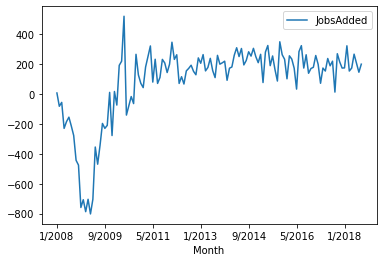

In [3]:
# Now if we want plot using the date values .... Looks ok, but what if
# we want to zoom on specific dates -- i.e., do some date math?
df.plot(x="Month", y="JobsAdded")

In [4]:
# The Month values look like dates (month/year), but what's the datatype?
type(df['Month'].iloc[0])

str

In [5]:
# let's grab one and see what we can do with it
row = 19
date_str = df['Month'].iloc[row]
date_str, type(date_str)

('8/2009', str)

In [6]:
# We can convert it to a Datetime object using the Python datetime module
date_dtg = datetime.datetime.strptime(date_str, "%m/%Y")
# Use the default print
print(date_dtg)
# Show the object and type
date_dtg, type(date_dtg)

2009-08-01 00:00:00


(datetime.datetime(2009, 8, 1, 0, 0), datetime.datetime)

In [7]:
# Assuming all the date strings are nice, we could use the parse_date parameter:
df = pd.read_csv("../data/10_us_economic_data.csv", parse_dates=['Month'])
df.head()

,Month,UnemploymentRate,JobsAdded,GDP
0,2008-01-01,5.0,8.0,14651.04
1,2008-02-01,4.9,-81.0,NaN
2,2008-03-01,5.1,-55.0,NaN
3,2008-04-01,5.0,-229.0,14805.61
4,2008-05-01,5.4,-184.0,NaN


In [8]:
# Now look at the Month column ...
type(df['Month'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df['Month'].iloc[12].strftime("%B %d, %Y")

'January 01, 2009'

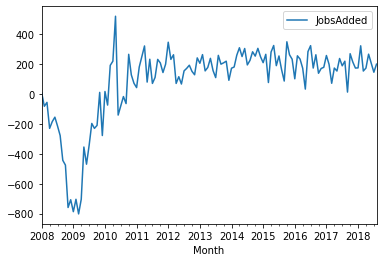

In [10]:
# Now look at the plot with the month as the x axis
df.plot(x="Month", y="JobsAdded")

In [11]:
# We can do date/time math, now
# add a time component to a datetime
df['Month'].iloc[12] + datetime.timedelta(hours=5)

Timestamp('2009-01-01 05:00:00')

In [12]:
# add a new column with datetime
df['DateTime'] = df['Month']
df.head()

,Month,UnemploymentRate,JobsAdded,GDP,DateTime
0,2008-01-01,5.0,8.0,14651.04,2008-01-01
1,2008-02-01,4.9,-81.0,NaN,2008-02-01
2,2008-03-01,5.1,-55.0,NaN,2008-03-01
3,2008-04-01,5.0,-229.0,14805.61,2008-04-01
4,2008-05-01,5.4,-184.0,NaN,2008-05-01


In [13]:
# Since we don't have times, let's assign random times for the given day
for j in range(len(df)):
    df.at[j, 'DateTime'] = df.at[j,'DateTime'] + datetime.timedelta(minutes=np.random.randint(24*60))
df.head()

,Month,UnemploymentRate,JobsAdded,GDP,DateTime
0,2008-01-01,5.0,8.0,14651.04,2008-01-01 20:44:00
1,2008-02-01,4.9,-81.0,NaN,2008-02-01 21:23:00
2,2008-03-01,5.1,-55.0,NaN,2008-03-01 00:17:00
3,2008-04-01,5.0,-229.0,14805.61,2008-04-01 00:14:00
4,2008-05-01,5.4,-184.0,NaN,2008-05-01 01:06:00


In [14]:
# Revist formatting
date_dtg = df['DateTime'].iloc[3]
fmts = ["%c","%B %d, %Y", "%d/%m/%Y", "%m/%y", "%A %B %d, %Y", "%m/%d/%Y %H:%M:%S", "%I:%M:%S %p"]
for fmt in fmts:
    print (date_dtg.strftime(fmt))

Tue Apr  1 00:14:00 2008
April 01, 2008
01/04/2008
04/08
Tuesday April 01, 2008
04/01/2008 00:14:00
12:14:00 AM
